In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
import itertools
import datetime

In [232]:
food_data = pd.read_json('data/food_data1.json')
for i in range(2, 12):
    filename = 'data/food_data' + str(i) + '.json'
    df = pd.read_json(filename)
    food_data = pd.concat([food_data, df], ignore_index=True)

healthcare_data = pd.read_json('data/healthcare_data1.json')
for i in range(2, 5):
    filename = 'data/healthcare_data' + str(i) + '.json'
    df = pd.read_json(filename)
    healthcare_data = pd.concat([healthcare_data, df], ignore_index=True)

major_purchases_data = pd.read_json('data/major_purchases_data1.json')
for i in range(2, 7):
    filename = 'data/major_purchases_data' + str(i) + '.json'
    df = pd.read_json(filename)
    major_purchases_data = pd.concat([major_purchases_data, df], ignore_index=True)

utility_data = pd.read_json('data/utility_data1.json')
for i in range(2, 8):
    filename = 'data/utility_data' + str(i) + '.json'
    df = pd.read_json(filename)
    utility_data = pd.concat([utility_data, df], ignore_index=True)

food_data.drop(columns=['series id'], inplace=True)
healthcare_data.drop(columns=['series id'], inplace=True)
major_purchases_data.drop(columns=['series id'], inplace=True)
utility_data.drop(columns=['series id'], inplace=True)

food_data = food_data.rename(columns={'value': 'CPI'})
healthcare_data = healthcare_data.rename(columns={'value': 'CPI'})
major_purchases_data = major_purchases_data.rename(columns={'value': 'CPI'})
utility_data = utility_data.rename(columns={'value': 'CPI'})

In [233]:
month_conversion = {'M01':'01', 'M02':'02', 'M03':'03', 'M04':'04', 'M05':'05', 'M06':'06', 'M07':'07', 'M08':'08',
                   'M09':'09', 'M10':'10', 'M11':'11', 'M12':'12'}

food_data['period'] = food_data['period'].replace(month_conversion)
healthcare_data['period'] = healthcare_data['period'].replace(month_conversion)
major_purchases_data['period'] = major_purchases_data['period'].replace(month_conversion)
utility_data['period'] = utility_data['period'].replace(month_conversion)

In [234]:
# create datetime objects for time series analysis
date_list = []
value = ''
for i in range(len(food_data['period'])):
    value = str(food_data['year'][i]) + '-' + str(food_data['period'][i]) + '-01'
    date_list.append(value)
food_data['date'] = date_list
food_data['date'] = pd.to_datetime(food_data['date'])

date_list.clear()
for i in range(len(healthcare_data['period'])):
    value = str(healthcare_data['year'][i]) + '-' + str(healthcare_data['period'][i]) + '-01'
    date_list.append(value)
healthcare_data['date'] = date_list
healthcare_data['date'] = pd.to_datetime(healthcare_data['date'])

date_list.clear()
for i in range(len(major_purchases_data['period'])):
    value = str(major_purchases_data['year'][i]) + '-' + str(major_purchases_data['period'][i]) + '-01'
    date_list.append(value)
major_purchases_data['date'] = date_list
major_purchases_data['date'] = pd.to_datetime(major_purchases_data['date'])

date_list.clear()
for i in range(len(utility_data['period'])):
    value = str(utility_data['year'][i]) + '-' + str(utility_data['period'][i]) + '-01'
    date_list.append(value)
utility_data['date'] = date_list
utility_data['date'] = pd.to_datetime(utility_data['date'])

In [235]:
food_df = pd.DataFrame(columns=['month', 'average CPI', 'year', 'date'])
healthcare_df = pd.DataFrame(columns=['month', 'average CPI', 'year', 'date'])
major_purchases_df = pd.DataFrame(columns=['month', 'average CPI', 'year', 'date'])
utility_df = pd.DataFrame(columns=['month', 'average CPI', 'year', 'date'])

month_array = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
year_array = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for month in month_array:
    df = food_data[food_data['period'] == month]
    for year in year_array:
        sub_df = df[df['year'] == year]
        CPI_avg = sub_df['CPI'].mean()
        
        # construct new dataframe with average CPIs and datetimes
        date = str(year) + '-' + str(month) + '-01'
        date = pd.to_datetime(date)
        food_df.loc[len(food_df)] = [month, CPI_avg, year, date]
        
for month in month_array:
    df = healthcare_data[healthcare_data['period'] == month]
    for year in year_array:
        sub_df = df[df['year'] == year]
        CPI_avg = sub_df['CPI'].mean()
        
        # construct new dataframe with average CPIs and datetimes
        date = str(year) + '-' + str(month) + '-01'
        date = pd.to_datetime(date)
        healthcare_df.loc[len(healthcare_df)] = [month, CPI_avg, year, date]

for month in month_array:
    df = major_purchases_data[major_purchases_data['period'] == month]
    for year in year_array:
        sub_df = df[df['year'] == year]
        CPI_avg = sub_df['CPI'].mean()
        
        # construct new dataframe with average CPIs and datetimes
        date = str(year) + '-' + str(month) + '-01'
        date = pd.to_datetime(date)
        major_purchases_df.loc[len(major_purchases_df)] = [month, CPI_avg, year, date]

for month in month_array:
    df = utility_data[utility_data['period'] == month]
    for year in year_array:
        sub_df = df[df['year'] == year]
        CPI_avg = sub_df['CPI'].mean()
        
        # construct new dataframe with average CPIs and datetimes
        date = str(year) + '-' + str(month) + '-01'
        date = pd.to_datetime(date)
        utility_df.loc[len(utility_df)] = [month, CPI_avg, year, date]

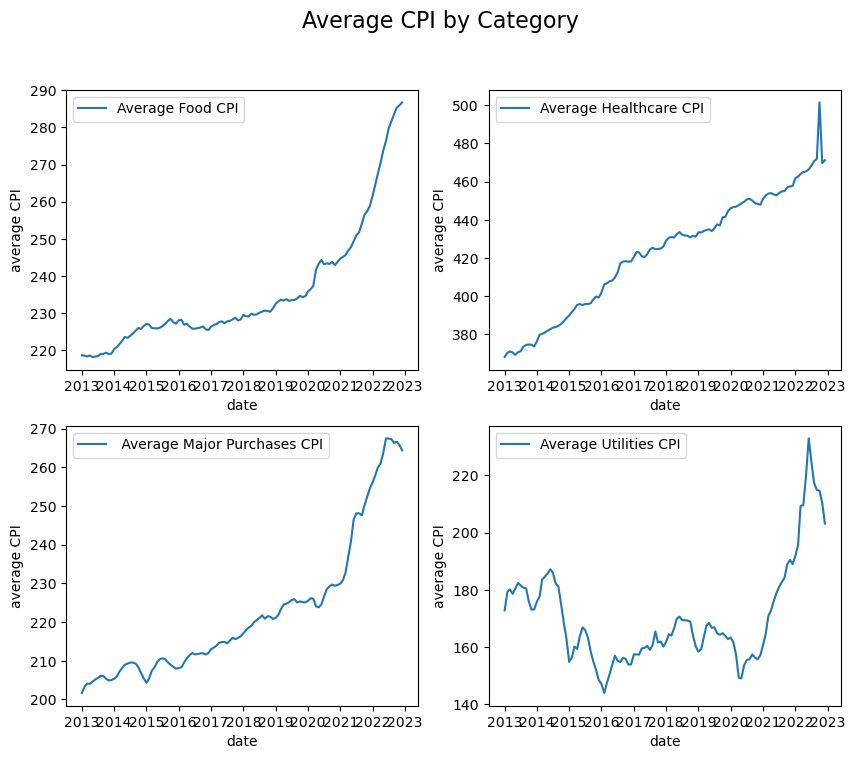

In [236]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.lineplot(x=food_df['date'], y=food_df['average CPI'], ax=axes[0, 0], label='Average Food CPI')
sns.lineplot(x=healthcare_df['date'], y=healthcare_df['average CPI'], ax=axes[0, 1], label='Average Healthcare CPI')
sns.lineplot(x=major_purchases_df['date'], y=major_purchases_df['average CPI'], ax=axes[1, 0], label=' Average Major Purchases CPI')
sns.lineplot(x=utility_df['date'], y=utility_df['average CPI'], ax=axes[1, 1], label='Average Utilities CPI')

fig.suptitle('Average CPI by Category', fontsize=16)

plt.show()

In [237]:
food_df.drop(columns=['month', 'year'], inplace=True)
healthcare_df.drop(columns=['month', 'year'], inplace=True)
major_purchases_df.drop(columns=['month', 'year'], inplace=True)
utility_df.drop(columns=['month', 'year'], inplace=True)

# date must be index for time series modelling
food_df.set_index('date', inplace=True)
healthcare_df.set_index('date', inplace=True)
major_purchases_df.set_index('date', inplace=True)
utility_df.set_index('date', inplace=True)

# date must be sorted for time series modelling
food_df.sort_index(inplace=True)
healthcare_df.sort_index(inplace=True)
major_purchases_df.sort_index(inplace=True)
utility_df.sort_index(inplace=True)

In [238]:
food_df

,average CPI
date,
2013-01-01,218.616545
2013-02-01,218.533636
2013-03-01,218.321727
2013-04-01,218.584455
2013-05-01,218.186273
...,...
2022-08-01,281.633818
2022-09-01,283.575545
2022-10-01,285.321909


In [239]:
food_x_train = food_df[food_df.index < '2022-01-01']
food_x_test = food_df[food_df.index >= '2022-01-01']
healthcare_x_train = healthcare_df[healthcare_df.index < '2022-01-01']
healthcare_x_test = healthcare_df[healthcare_df.index >= '2022-01-01']
major_purchases_x_train = major_purchases_df[major_purchases_df.index < '2022-01-01']
major_purchases_x_test = major_purchases_df[major_purchases_df.index >= '2022-01-01']
utility_x_train = utility_df[utility_df.index < '2022-01-01']
utility_x_test = utility_df[utility_df.index >= '2022-01-01']

In [240]:
index_years = pd.date_range(food_x_train.index[-1], freq='MS', periods=2)
index_years

DatetimeIndex(['2021-12-01', '2022-01-01'], dtype='datetime64[ns]', freq='MS')

C:\Users\Flowe\AppData\Roaming\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Flowe\AppData\Roaming\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Flowe\AppData\Roaming\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Flowe\AppData\Roaming\Anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


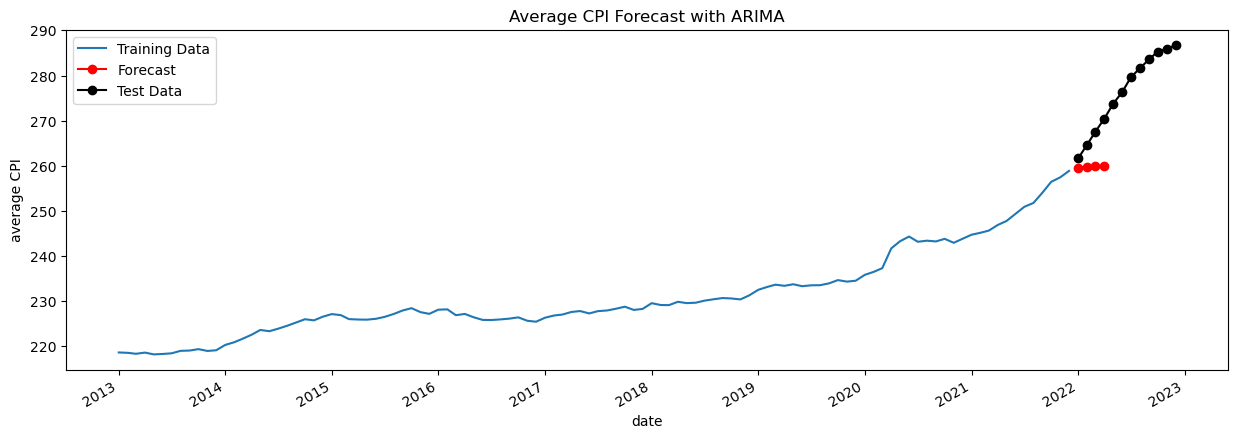

In [249]:
# Fit ARIMA model
arima_model = ARIMA(food_x_train['average CPI'], order=(2, 0, 0))
arima_model_fitted = arima_model.fit()

# Forecast
forecast_steps = 4  # Adjust as needed
forecast = arima_model_fitted.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=index_years[-1], periods=forecast_steps + 1, freq='M')[1:]

# Plotting
fig, ax = plt.subplots(figsize=(15, 5))
figure = sns.lineplot(x='date', y='average CPI', data=food_x_train, ax=ax, label='Training Data')
forecast.predicted_mean.plot(ax=ax, color='red', marker='o', label='Forecast')
food_x_test.plot(y='average CPI', ax=ax, color='black', marker='o', label='Test Data')

# Customize the plot as needed
plt.title('Average CPI Forecast with ARIMA')
plt.legend()
plt.show()

#print('RMSE is:', mean_squared_error(food_x_test['average CPI'], forecast.values, squared=False))

In [260]:
food_series = pd.Series(forecast, index=index_years)
forecast_df = pd.DataFrame({'Predicted Average CPI': food_series.values}, index=food_series.index)
forecast_df

# getting predicted values
predicted_means = food_series.apply(lambda x: x.predicted_mean)
predicted_means = predicted_means.reset_index(drop=True)
predicted_means = predicted_means.stack()
print(predicted_means)

food_series = pd.Series(predicted_means.values, index=index_years)

print(food_series)

0  2022-01-01    259.513261
   2022-02-01    259.790540
   2022-03-01    259.890815
   2022-04-01    259.906519
1  2022-01-01    259.513261
   2022-02-01    259.790540
   2022-03-01    259.890815
   2022-04-01    259.906519
dtype: float64


ValueError: Length of values (8) does not match length of index (2)